<a href="https://colab.research.google.com/github/zaynsidd/QBIO_401/blob/main/QBIO_401_Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
cft = pd.read_csv('/content/corrafterrain.bracken', sep = '\t')
cft.head()

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads
0,Streptococcus sp. oral taxon 431,712633,S,20,4,24,0.00001
1,Neorhizobium sp. NCHU2750,1825976,S,860,196,1056,0.00022
2,Pseudomonas sp. MT-1,150396,S,100,195,295,0.00006
3,Ahniella affigens,2021234,S,549,7,556,0.00011
4,Sinorhizobium sp. CCBAU 05631,794846,S,72,83,155,0.00003


In [ ]:
#Question 1
cft.shape[0]

4539

In [ ]:
#Question 2
total = cft['new_est_reads'].sum()
total

4884486

In [ ]:
#Question 3
added = cft['added_reads'].sum()
print(added/total)

0.2392575186007289


In [ ]:
cft['percent_added'] = cft['added_reads']/cft['new_est_reads']
cft.head()

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,percent_added
0,Streptococcus sp. oral taxon 431,712633,S,20,4,24,0.00001,0.166667
1,Neorhizobium sp. NCHU2750,1825976,S,860,196,1056,0.00022,0.185606
2,Pseudomonas sp. MT-1,150396,S,100,195,295,0.00006,0.661017
3,Ahniella affigens,2021234,S,549,7,556,0.00011,0.012590
4,Sinorhizobium sp. CCBAU 05631,794846,S,72,83,155,0.00003,0.535484


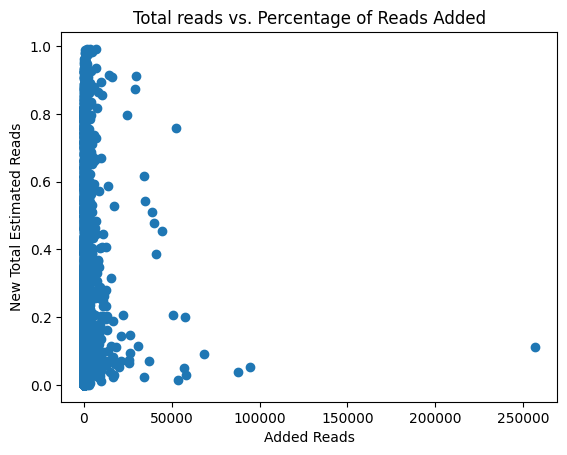

In [ ]:
#Question 4
plt.scatter(x='new_est_reads', y='percent_added', data=cft)
plt.title('Total reads vs. Percentage of Reads Added')
plt.xlabel('Added Reads')
plt.ylabel('New Total Estimated Reads')
plt.show()

Question 4:
It seems that most species are quite similar in the total number of added reads, with a somewhat uniform distribution, but quite different in percentages of reads added. We also see very few (relatively speaking) species that have above 25,000 added reads.

In [ ]:
#Question 5
one_percent = cft[cft['fraction_total_reads']>0.01].sort_values(by='fraction_total_reads', ascending=False)
one_percent.head()

,name,taxonomy_id,taxonomy_lvl,kraken_assigned_reads,added_reads,new_est_reads,fraction_total_reads,percent_added
1134,Limnohabitans sp. 63ED37-2,1678128,S,228023,28579,256602,0.05251,0.111375
2039,Hydrogenophaga sp. RAC07,1842537,S,89780,4929,94709,0.01938,0.052044
1622,Polynucleobacter necessarius,576610,S,84187,3397,87584,0.01792,0.038786
1135,Limnohabitans sp. 103DPR2,1678129,S,62163,6173,68336,0.01398,0.090333
1069,Homo sapiens,9606,S,56360,1632,57992,0.01187,0.028142


In [ ]:
print("Number of speciest with fraction_total_species greater than 1%:", one_percent.shape[0])
print("Highest fraction species: ", one_percent.iloc[0]['name'])
print("Fraction: ", one_percent.iloc[0]['fraction_total_reads'] )

Number of speciest with fraction_total_species greater than 1%: 10
Highest fraction species:  Limnohabitans sp. 63ED37-2
Fraction:  0.05251


In [ ]:
#Question 6
rng = np.random.default_rng()
fractions = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]
fractions_scaled = np.array(fractions) * 4884486
results = rng.poisson(fractions_scaled, 6)
print(results)

[    505    4996   48920  488406 2438989 4883075]


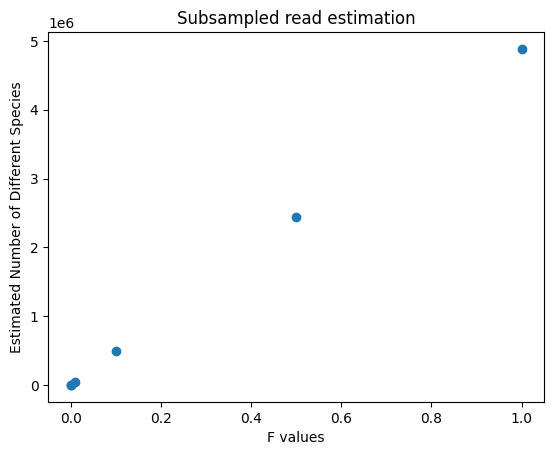

In [ ]:
plt.scatter(x=fractions, y=results)
plt.title('Subsampled read estimation')
plt.xlabel('F values')
plt.ylabel('Estimated Number of Different Species')
plt.show()
#Note this y-scale is logarithmic

f = 0.1 would yield about the same results as our dataset

f = 0.0001, 0.0001, 0.01 would yield far too few